In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import collections
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

from data_cleaning import clean_data

In [36]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

train_data = clean_data(train_data)
test_data = clean_data(test_data)

x_train = train_data.drop("Survived", axis=1)
y_train = train_data["Survived"]

In [38]:
# Baseline: Random using prior
survival_prior = train_data["Survived"].mean()
print("Prior prob. of survival: {:.2f}".format(survival_prior))
predictions = np.random.choice([0,1], len(train_data), p=[1-survival_prior, survival_prior])
print("Accuracy: {:.2f}".format(accuracy_score(y_train, predictions)))

Prior prob. of survival: 0.38
Accuracy: 0.55


In [4]:
# Logistic regression
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_train)
test_scaled = scaler.transform(test_data)

logistic_regression = LogisticRegression()
logistic_regression.fit(x_scaled, y_train)

predictions = logistic_regression.predict(x_scaled)
print("Accuracy: {:.2f}".format(accuracy_score(y_train, predictions)))

Accuracy: 0.80


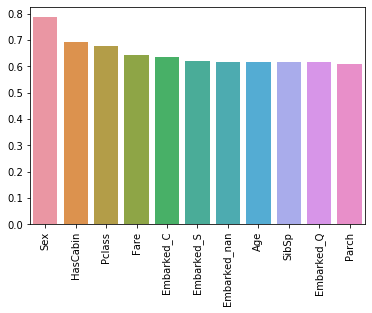

In [23]:
# Single-feature regressions
accuracies = {}
for independent_variable in x_train.columns:
    x_train_small = train_data[[independent_variable]]
    scaler = MinMaxScaler()
    x_scaled_small = scaler.fit_transform(x_train_small)
    logistic_regression = LogisticRegression()
    logistic_regression.fit(x_scaled_small, y_train)
    predictions = logistic_regression.predict(x_scaled_small)
    acc = accuracy_score(y_train, predictions)
    accuracies[independent_variable] = acc
accuracies_ordered = collections.OrderedDict({k: v for k, v in sorted(accuracies.items(), key=lambda item: item[1], reverse=True)})
acc_bars = sns.barplot(list(accuracies_ordered.keys()), list(accuracies_ordered.values()))
for item in acc_bars.get_xticklabels():
    item.set_rotation("vertical")

In [61]:
# Bayesian inference on sex

posteriors = {}
for sex in range(2):
    # likelihood: Probability of sex given survived
    joint_probability = len(train_data[(train_data["Survived"] == 1) & (train_data["Sex"] == sex)]) / len(train_data)
    likelihood = joint_probability / survival_prior

    # evidence: Number of sex / number of passengers
    evidence = len(train_data[train_data["Sex"] == sex]) / len(train_data)
    posterior = (likelihood * survival_prior) / evidence
    posteriors[sex] = posterior
def draw_survived(x):
    return np.random.choice([0,1], p=[1-posteriors[x], posteriors[x]])
predictions = x_train["Sex"].apply(draw_survived)
print("Accuracy: {:.2f}".format(accuracy_score(y_train, predictions)))

Accuracy: 0.66
